In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
image = cv2.imread('/home/nader/DesignGenie/sample_inputs/images/sample_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

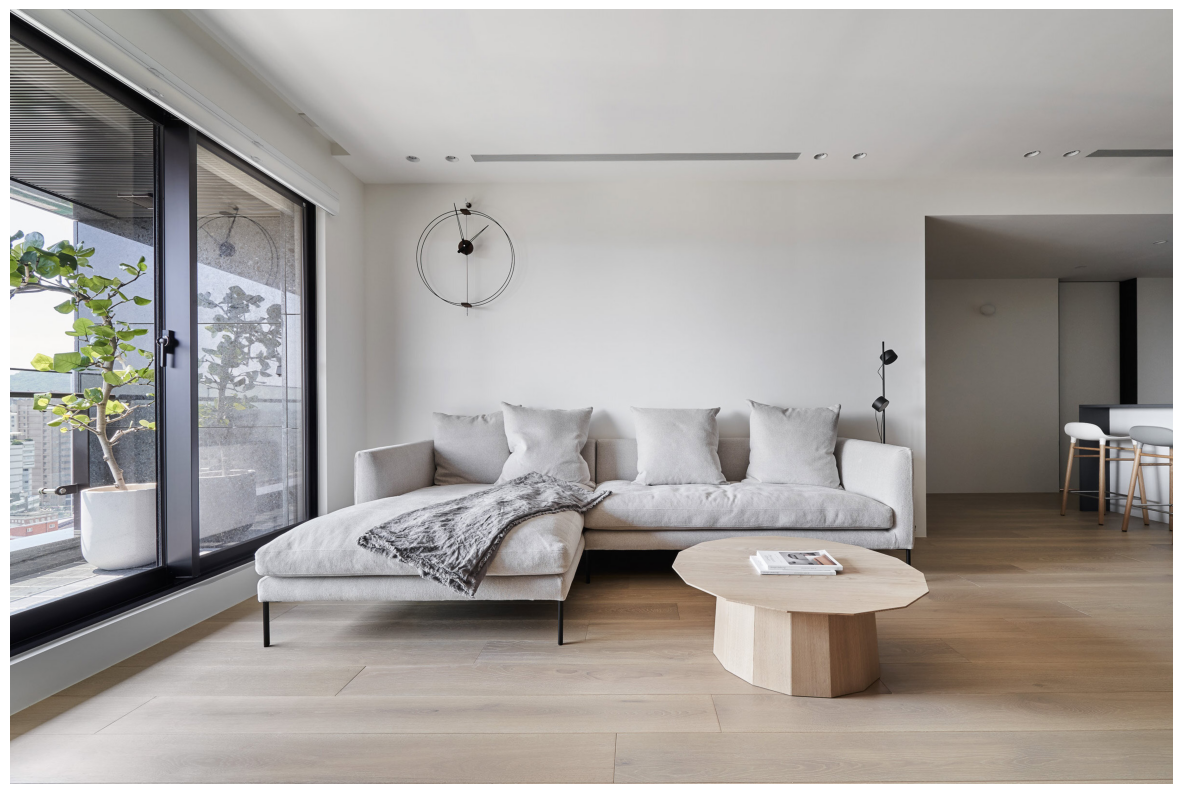

In [3]:
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

sam = sam_model_registry["vit_l"](checkpoint="/home/nader/DesignGenie/checkpoints/sam_vit_l_0b3195.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

In [13]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

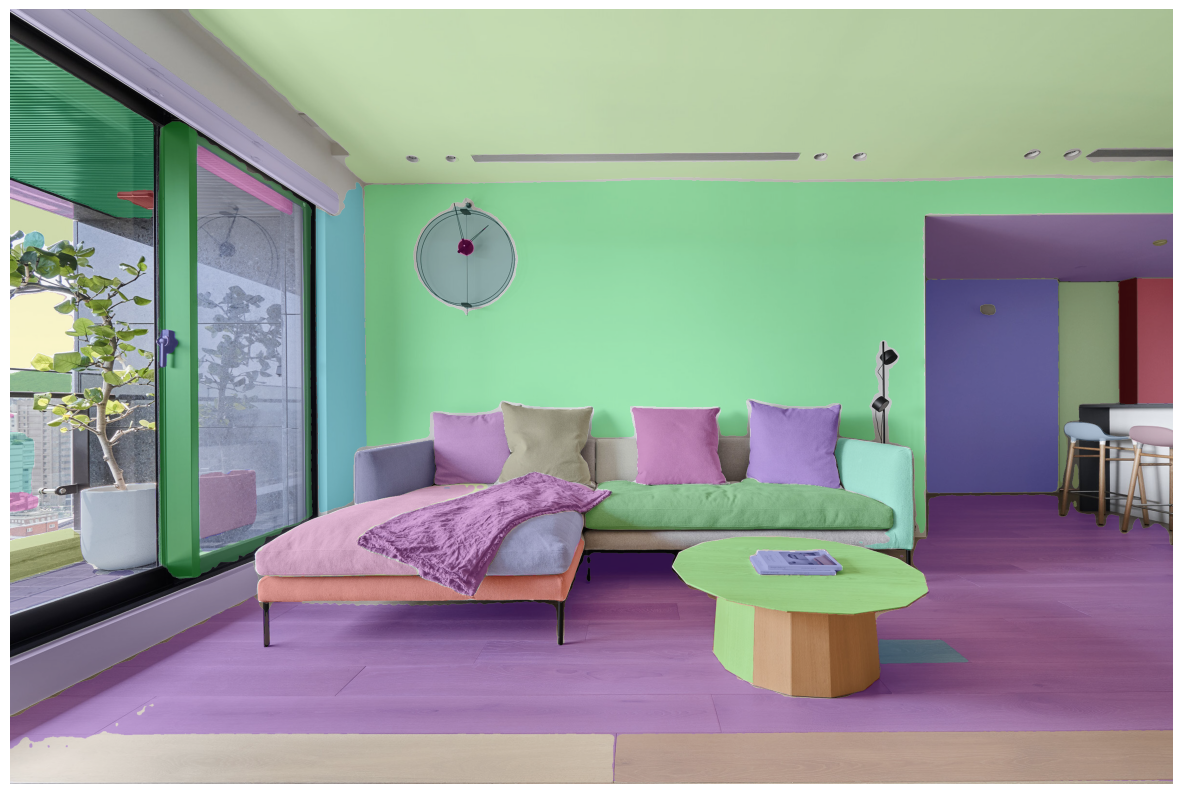

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [7]:
from transformers import pipeline

# image_processor = AutoImageProcessor.from_pretrained("MariaK/scene_segmentation")
# inputs = image_processor(image, return_tensors="pt")

segmenter = AutoModelForSemanticSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")
# segmenter = pipeline(model="facebook/detr-resnet-50-panoptic")

ValueError: Unrecognized configuration class <class 'transformers.models.detr.configuration_detr.DetrConfig'> for this kind of AutoModel: AutoModelForSemanticSegmentation.
Model type should be one of BeitConfig, Data2VecVisionConfig, DPTConfig, MobileNetV2Config, MobileViTConfig, SegformerConfig, UperNetConfig.

In [20]:
output = segmenter('/home/nader/DesignGenie/sample_inputs/images/sample_1.jpg')



In [21]:
output

[{'score': 0.986068,
  'label': 'chair',
  'mask': <PIL.Image.Image image mode=L size=2400x1600>},
 {'score': 0.993186,
  'label': 'window-other',
  'mask': <PIL.Image.Image image mode=L size=2400x1600>},
 {'score': 0.992444,
  'label': 'chair',
  'mask': <PIL.Image.Image image mode=L size=2400x1600>},
 {'score': 0.99698,
  'label': 'LABEL_186',
  'mask': <PIL.Image.Image image mode=L size=2400x1600>},
 {'score': 0.984389,
  'label': 'LABEL_199',
  'mask': <PIL.Image.Image image mode=L size=2400x1600>},
 {'score': 0.994995,
  'label': 'floor-wood',
  'mask': <PIL.Image.Image image mode=L size=2400x1600>},
 {'score': 0.982739,
  'label': 'LABEL_189',
  'mask': <PIL.Image.Image image mode=L size=2400x1600>},
 {'score': 0.985105,
  'label': 'potted plant',
  'mask': <PIL.Image.Image image mode=L size=2400x1600>}]